In [1]:
from dmml_project.models.create_model import create_model
import sklearn.metrics as metrics
from dmml_project.models.model import Model
from dmml_project import PROJECT_ROOT
from dmml_project.dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

KIND = "neural_network"

dataset: Dataset = Dataset.load(f"{PROJECT_ROOT}/data/dataset.tsv")
model: Model = create_model(kind=KIND, network="lstm_embeddings", base_size=16, depth=3, dropout=0.2)

In [2]:
train, valid = dataset.fold(0, 5)
history = model.train(train, valid=valid)
accuracy, cm = model.evaluate(valid, metric=lambda pred, true: (metrics.accuracy_score(pred,true), metrics.confusion_matrix(pred,true, normalize="true")))

Predicting: 100%|██████████| 2856/2856 [00:46<00:00, 61.04it/s]


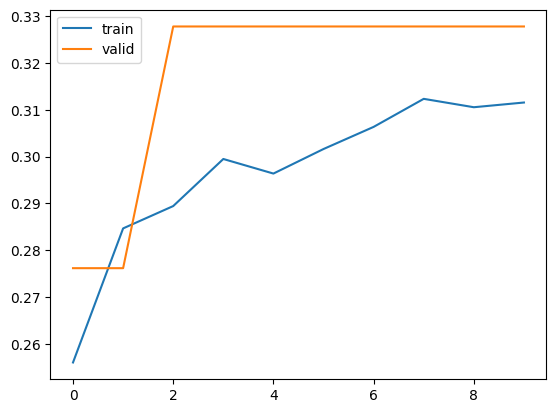

In [3]:
if KIND == "neural_network":
    train_accuracy, valid_accuracy = history
    plt.plot(train_accuracy, label="train")
    plt.plot(valid_accuracy, label="valid")
    plt.legend()
    plt.show()

Accuracy: 32.78%


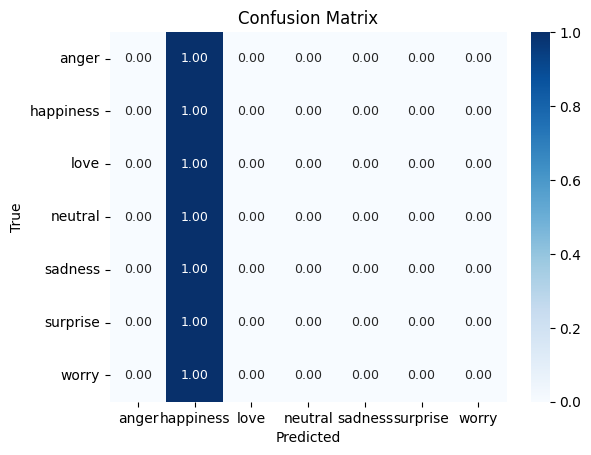

In [4]:
print(f"Accuracy: {accuracy*100:.2f}%")
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 9}, xticklabels=model.classes(), yticklabels=model.classes())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()